In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
TARGET_COL = "t2m"
SPLIT_DATE = "2015-01-01"

COLS_TO_DROP = ["date", "season_num", "year", "month", "day", "week", "weekday"]

In [3]:
df = pd.read_csv("../Dataset/nasa_power_prepared_data.csv", parse_dates=["date"])
df = df.sort_values("date")

In [4]:
features = [col for col in df.columns if col not in COLS_TO_DROP + [TARGET_COL]]
X = df[COLS_TO_DROP + features].copy()
Y = df[TARGET_COL]

split_date = pd.to_datetime(SPLIT_DATE)

In [5]:
X_train = X[X['date'] < split_date].drop(columns=['date'] + [col for col in COLS_TO_DROP if col != 'date'])
X_test = X[X['date'] >= split_date].drop(columns=['date'] + [col for col in COLS_TO_DROP if col != 'date'])
y_train = Y[X['date'] < split_date]
y_test = Y[X['date'] >= split_date]

In [6]:
test_dates = X[X['date'] >= split_date]['date']

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (12418, 69), y_train shape: (12418,)
X_test shape: (3967, 69), y_test shape: (3967,)


In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,      # จำนวนต้นไม้ใน Forest
    max_depth=10,          # ความลึกสูงสุดของต้นไม้
    random_state=42,      
    n_jobs=-1              
)

print("\n" + "=" * 50)
print(f"Start training Random Forest Model for {TARGET_COL}...")
rf_model.fit(X_train, y_train)
print("Random Forest Training Complete.")
print("=" * 50)


Start training Random Forest Model for t2m...
Random Forest Training Complete.


In [8]:
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Model Performance (Target: {TARGET_COL})")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


Random Forest Model Performance (Target: t2m)
RMSE: 0.0743
R-squared (R2 Score): 0.9984


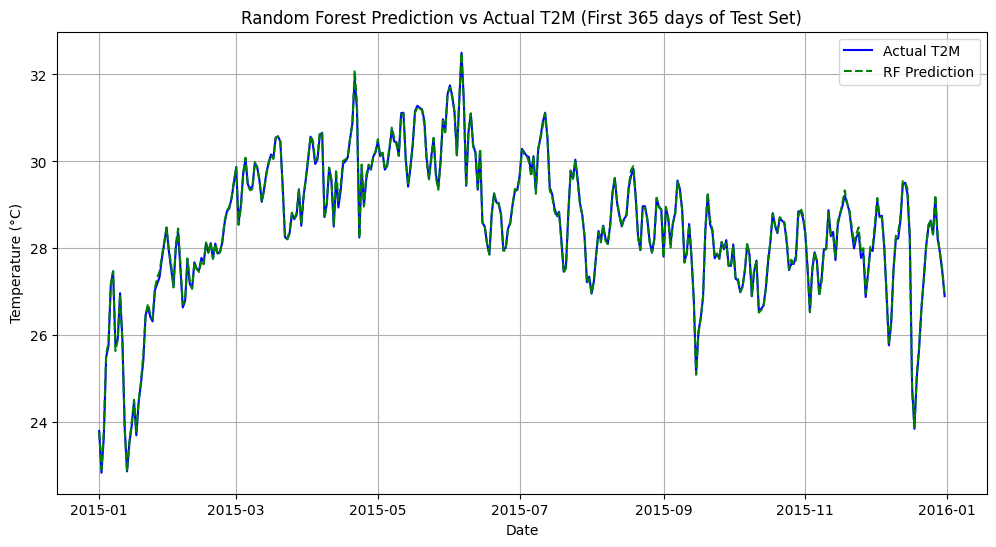

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates.iloc[:365], y_test.iloc[:365], label="Actual T2M", color='blue')
plt.plot(test_dates.iloc[:365], y_pred[:365], label="RF Prediction", color='green', linestyle='--')
plt.title(f"Random Forest Prediction vs Actual T2M (First 365 days of Test Set)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()